<h1>Entropy<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Computing-entropy-random-signal" data-toc-modified-id="Computing-entropy-random-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Computing entropy random signal</a></span><ul class="toc-item"><li><span><a href="#other-entropy-funtions" data-toc-modified-id="other-entropy-funtions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>other entropy funtions</a></span></li></ul></li><li><span><a href="#Entropy-of-EEG-signal" data-toc-modified-id="Entropy-of-EEG-signal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entropy of EEG signal</a></span></li></ul></div>

## Computing entropy random signal

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spkit as sp
sp.__version__

'0.0.9.4'

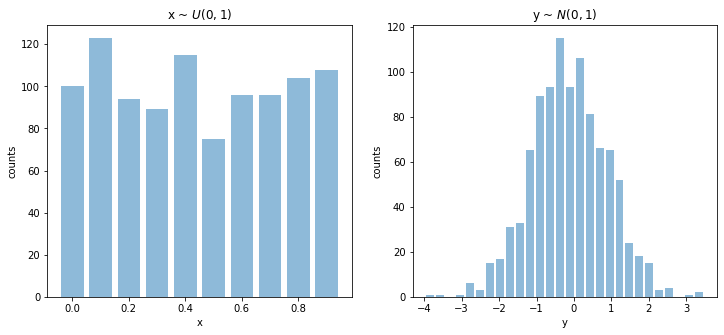

In [40]:
x = np.random.rand(1000)
y = np.random.randn(1000)

plt.figure(figsize=(12,5))
plt.subplot(121)
sp.HistPlot(x,show=False)
plt.title(r'x ~ $U(0,1)$')
plt.ylabel('counts')
plt.xlabel('x')
plt.subplot(122)
sp.HistPlot(y,show=False)
plt.title(r'y ~ $N(0,1)$')
plt.ylabel('counts')
plt.xlabel('y')
plt.show()

In [41]:
#Shannan entropy
H_x= sp.entropy(x,alpha=1)
H_y= sp.entropy(y,alpha=1)

#Rényi entropy
Hr_x= sp.entropy(x,alpha=2)
Hr_y= sp.entropy(y,alpha=2)

H_xy= sp.entropy_joint(x,y)

H_x1y= sp.entropy_cond(x,y)
H_y1x= sp.entropy_cond(y,x)

I_xy = sp.mutual_Info(x,y)

H_xy_cross= sp.entropy_cross(x,y)

D_xy= sp.entropy_kld(x,y)


print('Shannan entropy')
print('---------------')
print('Entropy of x: H(x) = ',H_x)
print('Entropy of y: H(y) = ',H_y)
print('-')
print('Rényi entropy')
print('---------------')
print('Entropy of x: H(x) = ',Hr_x)
print('Entropy of y: H(y) = ',Hr_y)
print('-')
print('Mutual Information I(x,y)  = \t',I_xy)
print('Joint Entropy H(x,y)       = \t',H_xy)
print('-')
print('Conditional Entropy of : H(x|y) = ',H_x1y)
print('Conditional Entropy of : H(y|x) = ',H_y1x)
print('-')
print('Cross Entropy of : H(x,y)              = \t',H_xy_cross)
print('Kullback–Leibler divergence : Dkl(x,y) = \t',D_xy)

Shannan entropy
---------------
Entropy of x: H(x) =  3.3099186173010606
Entropy of y: H(y) =  3.954125044004315
-
Rényi entropy
---------------
Entropy of x: H(x) =  3.2983462626847766
Entropy of y: H(y) =  3.7270356287262256
-
Mutual Information I(x,y)  = 	 0.11967403367033924
Joint Entropy H(x,y)       = 	 7.144369627635037
-
Conditional Entropy of : H(x|y) =  3.1902445836307214
Conditional Entropy of : H(y|x) =  3.834451010333976
-
Cross Entropy of : H(x,y)              = 	 12.308876524726335
Kullback–Leibler divergence : Dkl(x,y) = 	 6.1379138504220485


### other entropy funtions

In [49]:
Hx_se = sp.entropy_spectral(x,fs=1,method='fft')
Hx_sam = sp.entropy_sample(x,m=4,r=0.2*np.std(x))
Hx_apx = sp.entropy_approx(x,m=4,r=0.2*np.std(x))
Hx_svd = sp.entropy_svd(x,order=3, delay=1)
Hx_prm = sp.entropy_permutation(x,order=3, delay=1)


Hy_se = sp.entropy_spectral(y,fs=1,method='fft')
Hy_sam = sp.entropy_sample(y,m=4,r=0.2*np.std(y))
Hy_apx = sp.entropy_approx(y,m=4,r=0.2*np.std(y))
Hy_svd = sp.entropy_svd(y,order=3, delay=1)
Hy_prm = sp.entropy_permutation(y,order=3, delay=1)

In [62]:
HX = [H_x,Hr_x,Hx_se,Hx_sam,Hx_apx, Hx_svd, Hx_prm]
HY = [H_y,Hr_y,Hy_se,Hy_sam,Hy_apx, Hy_svd, Hy_prm]
C1 =  ['Shannan entropy', 'Rényi entropy','Spectral entropy','Sample entropy',
      'Approximate entropy','SVD entropy','Permutation entropy']

In [63]:
display(pd.DataFrame(np.c_[HX, HY],index=C1, columns=['x','y']))

,x,y
Shannan entropy,3.309919,3.954125
Rényi entropy,3.298346,3.727036
Spectral entropy,0.745156,0.693282
Sample entropy,2.264364,2.460809
Approximate entropy,0.091753,0.098248
SVD entropy,1.354216,1.584883
Permutation entropy,2.581670,2.584228


In [64]:
HXY = [I_xy, H_xy, H_x1y, H_y1x, H_xy_cross, D_xy]
C2   = ['Mutual Information: I(x,y)', 'Joint Entropy: H(x,y)', 'Conditional Entropy: H(x|y)',
      'Conditional Entropy: H(y|x)','Cross Entropy: H(x,y)', 'Kullback–Leibler divergence : Dkl(x,y)']

In [65]:
display(pd.DataFrame(np.c_[HXY],index=C2, columns=['x,y']))

,"x,y"
"Mutual Information: I(x,y)",0.119674
"Joint Entropy: H(x,y)",7.144370
Conditional Entropy: H(x|y),3.190245
Conditional Entropy: H(y|x),3.834451
"Cross Entropy: H(x,y)",12.308877
"Kullback–Leibler divergence : Dkl(x,y)",6.137914


## Entropy of EEG signal

In [66]:
from spkit.data import load_data

In [67]:
X,ch_names = load_data.eegSample()
print(X.shape)
print(ch_names)

(2048, 14)
['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


In [68]:
x1 =X[:,0] #'AF3' - Frontal Lobe
x2 =X[:,6] #'O1'  - Occipital Lobe
#Shannan entropy
H_x1= sp.entropy(x1,alpha=1)
H_x2= sp.entropy(x2,alpha=1)

#Rényi entropy
Hr_x1= sp.entropy(x1,alpha=2)
Hr_x2= sp.entropy(x2,alpha=2)

#Joint entropy
H_x12= sp.entropy_joint(x1,x2)

#Conditional Entropy
H_x12= sp.entropy_cond(x1,x2)
H_x21= sp.entropy_cond(x2,x1)

#Mutual Entropy
I_x12 = sp.mutual_Info(x1,x2)

#Cross Entropy
H_x12_cross= sp.entropy_cross(x1,x2)

#Diff Entropy
D_x12= sp.entropy_kld(x1,x2)


print('Shannan entropy')
print('Entropy of x1: H(x1) =\t ',H_x1)
print('Entropy of x2: H(x2) =\t ',H_x2)
print('-')
print('Rényi entropy')
print('Entropy of x1: H(x1) =\t ',Hr_x1)
print('Entropy of x2: H(x2) =\t ',Hr_x2)
print('-')
print('Joint Entropy H(x1,x2) =\t',H_x12)
print('Mutual Information I(x1,x2) =\t',I_x12)
print('Conditional Entropy of : H(x1|x2) =\t',H_x12)
print('Conditional Entropy of : H(x2|x1) =\t',H_x21)
print('-')
print('Cross Entropy of : H(x1,x2) =\t',H_x12_cross)
print('Kullback–Leibler divergence : Dkl(x1,x2) =\t',D_x12)

Shannan entropy
Entropy of x1: H(x1) =	  4.811416424350645
Entropy of x2: H(x2) =	  4.697278111823318
-
Rényi entropy
Entropy of x1: H(x1) =	  4.239955818998481
Entropy of x2: H(x2) =	  4.145472461333239
-
Joint Entropy H(x1,x2) =	 3.655513859907648
Mutual Information I(x1,x2) =	 1.1559025644429965
Conditional Entropy of : H(x1|x2) =	 3.655513859907648
Conditional Entropy of : H(x2|x1) =	 3.541375547380321
-
Cross Entropy of : H(x1,x2) =	 5.686498222841184
Kullback–Leibler divergence : Dkl(x1,x2) =	 0.7202757885313226
